In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%pyplot inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
UsageError: Line magic function `%pyplot` not found.


In [16]:
df=pd.read_csv('data.csv', header=0, names=['variable','date_time','value'], index_col=1)

In [17]:
# From date_time column, we know that data is recorded every 5 mins (sampling rate)
df.head()

,variable,value
date_time,,
2021-11-01 00:04:32 GMT+0000,generationPower,-0.016
2021-11-01 00:09:34 GMT+0000,generationPower,-0.015
2021-11-01 00:14:36 GMT+0000,generationPower,-0.015
2021-11-01 00:19:38 GMT+0000,generationPower,-0.015
2021-11-01 00:24:40 GMT+0000,generationPower,-0.015


In [20]:
df.index

Index(['2021-11-01 00:04:32 GMT+0000', '2021-11-01 00:09:34 GMT+0000',
       '2021-11-01 00:14:36 GMT+0000', '2021-11-01 00:19:38 GMT+0000',
       '2021-11-01 00:24:40 GMT+0000', '2021-11-01 00:29:42 GMT+0000',
       '2021-11-01 00:34:44 GMT+0000', '2021-11-01 00:39:46 GMT+0000',
       '2021-11-01 00:44:48 GMT+0000', '2021-11-01 00:49:50 GMT+0000',
       ...
       '2021-10-31 22:13:47 GMT+0000', '2021-10-31 22:18:49 GMT+0000',
       '2021-10-31 22:23:51 GMT+0000', '2021-10-31 22:28:53 GMT+0000',
       '2021-10-31 22:33:55 GMT+0000', '2021-10-31 22:38:57 GMT+0000',
       '2021-10-31 22:43:59 GMT+0000', '2021-10-31 22:49:01 GMT+0000',
       '2021-10-31 22:54:03 GMT+0000', '2021-10-31 22:59:05 GMT+0000'],
      dtype='object', name='date_time', length=49885)

In [23]:
#Convert time to datetime index and disable timezone
df.index = pd.to_datetime(df.index, utc=True)
df.index=df.index.tz_convert(None)

In [40]:
df.index

DatetimeIndex(['2021-11-01 00:04:32', '2021-11-01 00:09:34',
               '2021-11-01 00:14:36', '2021-11-01 00:19:38',
               '2021-11-01 00:24:40', '2021-11-01 00:29:42',
               '2021-11-01 00:34:44', '2021-11-01 00:39:46',
               '2021-11-01 00:44:48', '2021-11-01 00:49:50',
               ...
               '2021-10-31 22:13:47', '2021-10-31 22:18:49',
               '2021-10-31 22:23:51', '2021-10-31 22:28:53',
               '2021-10-31 22:33:55', '2021-10-31 22:38:57',
               '2021-10-31 22:43:59', '2021-10-31 22:49:01',
               '2021-10-31 22:54:03', '2021-10-31 22:59:05'],
              dtype='datetime64[ns]', name='date_time', length=49885, freq=None)

In [ ]:
df = df.sort_index()

In [29]:
#Check what kind of attribute in the data
attr=df['variable'].unique()
attr

array(['generationPower', 'loadsPower', 'batChargePower', 'SoC',
       'gridConsumptionPower'], dtype=object)

In [30]:
# We are only interested in loadspower, filter dataset 
l_df=df.loc[df['variable'] == 'loadsPower']

In [31]:
# Create new dataset including only the feature we want and sort the datetime accordingly

data=l_df.drop(['variable'],axis=1)
data = data.sort_index()
data.head()

,value
date_time,
2021-10-10 16:12:32,0.172
2021-10-10 16:17:34,0.190
2021-10-10 16:22:36,0.168
2021-10-10 16:27:38,0.167
2021-10-10 16:32:40,0.172


In [37]:
Ind = data.index
total_days=(Ind[-1]-Ind[0]).days
print('There are {} days of electricity consumption.'.format(total_days))

There are 36 days of electricity consumption.


In [41]:
H_data=data.asfreq(freq='1H',method='pad')
H_data.head()

,value
date_time,
2021-10-10 16:12:32,0.172
2021-10-10 17:12:32,0.126
2021-10-10 18:12:32,0.179
2021-10-10 19:12:32,0.128
2021-10-10 20:12:32,0.170


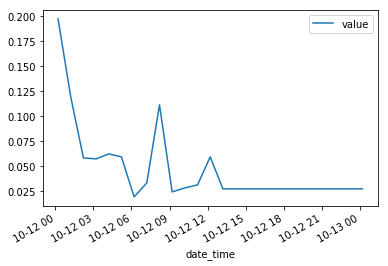

In [44]:
# a day usage plot
Day_data=H_data['2021-10-12 00:12:32':'2021-10-13 00:12:32']
Day_data.plot()

In [45]:
daily_ts_data=data.asfreq(pd.offsets.BDay(), method='pad')
daily_ts_data.head(5)

,value
date_time,
2021-10-11 16:12:32,0.062
2021-10-12 16:12:32,0.027
2021-10-13 16:12:32,0.048
2021-10-14 16:12:32,0.130
2021-10-15 16:12:32,0.045


In [60]:
def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    #sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=20)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=20)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=20)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


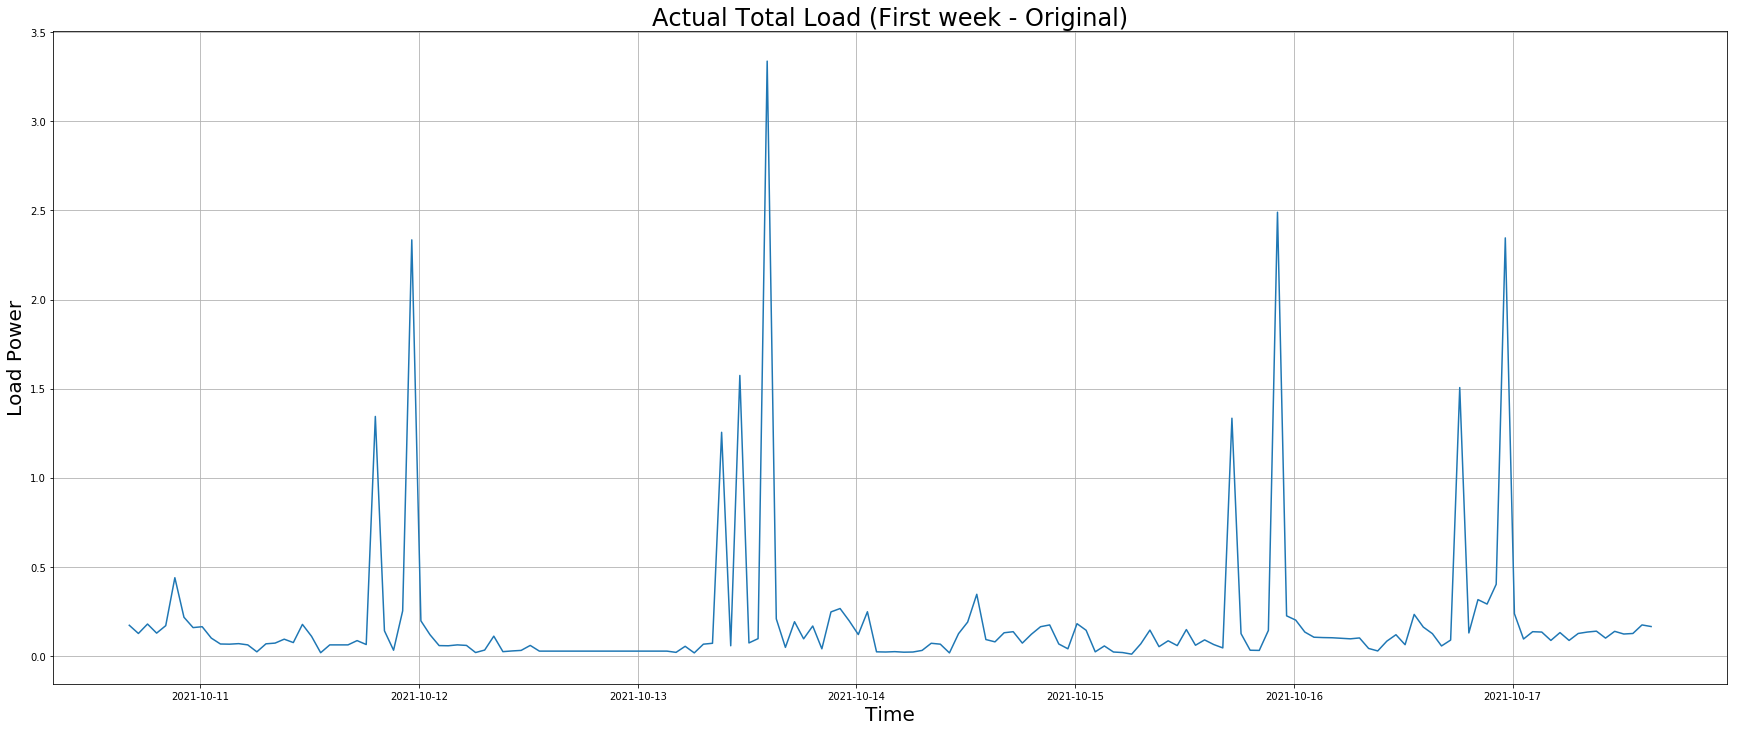

In [61]:
# First week usage plot
ax = plot_series(df=H_data, column='value', ylabel='Load Power',
                 title='Actual Total Load (First week - Original)', end=24*7)
plt.show()

In [52]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
H_data["day_of_week"] = H_data.index.weekday.map(day_mapping)

In [53]:
H_data.head()

,value,day_of_week
date_time,,
2021-10-10 16:12:32,0.172,Sunday
2021-10-10 17:12:32,0.126,Sunday
2021-10-10 18:12:32,0.179,Sunday
2021-10-10 19:12:32,0.128,Sunday
2021-10-10 20:12:32,0.170,Sunday


Text(0, 0.5, 'Load')

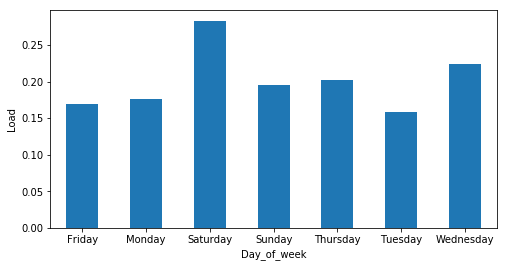

In [64]:
# day of week distribution plot
fig, axs = plt.subplots(figsize=(8, 4))
H_data.groupby(H_data['day_of_week'])["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Day_of_week")
plt.ylabel("Load")

In [65]:
def date_transform(df, encode_cols):
    # extract a few features from datetime
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['WeekofYear'] = df.index.weekofyear
    df['DayofWeek'] = df.index.weekday
    df['Hour'] = df.index.hour
    df['Minute'] = df.index.minute
    # one hot encoder for categorical variables
    for col in encode_cols:
        df[col] = df[col].astype('category')
        
    df = pd.get_dummies(df, columns=encode_cols)
    
    return df

In [71]:
# generate lag features

def generated_lagged(data,var,max_lag):
    for t in range(1, max_lag+1):
        data[var+'_lag'+str(t)] = data[var].shift(t)

In [77]:
#create rolling mean feature

load_val=data['value']
shifted = load_val.shift(1)


window1=shifted.rolling(window=2)
means1=window1.mean()

window2=shifted.rolling(window=7)
means2=window2.mean()

new_data=pd.concat([load_val, means1, means2], axis=1)
new_data.columns=['value','roll_mean_2', 'roll_mean_7']

In [78]:
generated_lagged(new_data, 'value',2)

In [79]:
new_data.head()

,value,roll_mean_2,roll_mean_7,value_lag1,value_lag2
date_time,,,,,
2021-10-10 16:12:32,0.172,NaN,NaN,NaN,NaN
2021-10-10 16:17:34,0.190,NaN,NaN,0.172,NaN
2021-10-10 16:22:36,0.168,0.1810,NaN,0.190,0.172
2021-10-10 16:27:38,0.167,0.1790,NaN,0.168,0.190
2021-10-10 16:32:40,0.172,0.1675,NaN,0.167,0.168


In [80]:
encode_cols = ['Month', 'DayofWeek', 'Hour']
Processed_data=date_transform(data, encode_cols)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [81]:
Processed_data.head()

,value,Year,WeekofYear,Minute,Month_10,Month_11,DayofWeek_0,DayofWeek_1,DayofWeek_2,DayofWeek_3,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
date_time,,,,,,,,,,,,,,,,,,,,,
2021-10-10 16:12:32,0.172,2021,40,12,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-10-10 16:17:34,0.190,2021,40,17,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-10-10 16:22:36,0.168,2021,40,22,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-10-10 16:27:38,0.167,2021,40,27,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2021-10-10 16:32:40,0.172,2021,40,32,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
#fill NaN by 0
Data=Processed_data.fillna(0)